<a href="https://colab.research.google.com/github/jelade/Jaleel/blob/master/Iris_task_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using Decition Tree on the Iris dataset







### Loading of Libraries and Data Importation

In [62]:
#Loading Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
#Data Importation
iris = pd.read_csv('/content/Iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Exploratory Data Analysis

In [64]:
iris.shape

(150, 6)

In [65]:
iris.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

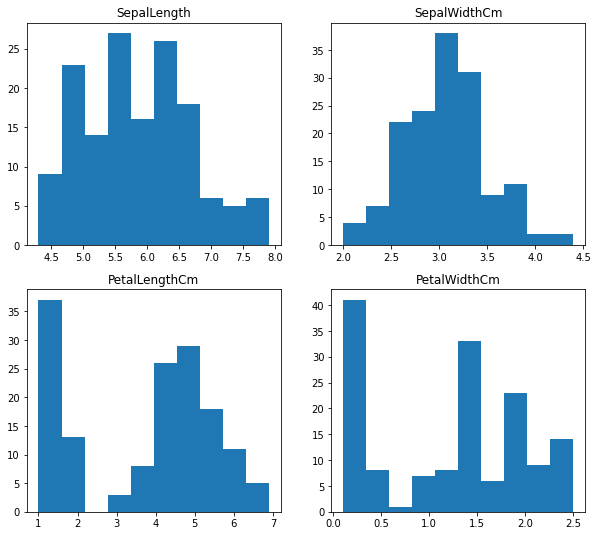

In [92]:
#CHECKING THE DISTRIBUTION OF THE DATASET
fig,ax = plt.subplots(2,2, figsize = (10,9))
ax[0,0].hist(iris.SepalLengthCm)
ax[0,1].hist(iris.SepalWidthCm)
ax[1,0].hist(iris.PetalLengthCm)
ax[1,1].hist(iris.PetalWidthCm )
ax[0,0].set_title("SepalLength")
ax[0,1].set_title("SepalWidthCm")
ax[1,0].set_title("PetalLengthCm")
ax[1,1].set_title("PetalWidthCm")
plt.show()

In [67]:
#GROUPING THE DATASET BASE ON SPECIES TO PLOT BAR CHART USING MATPLOTLIB
grouped = iris.groupby("Species").mean()

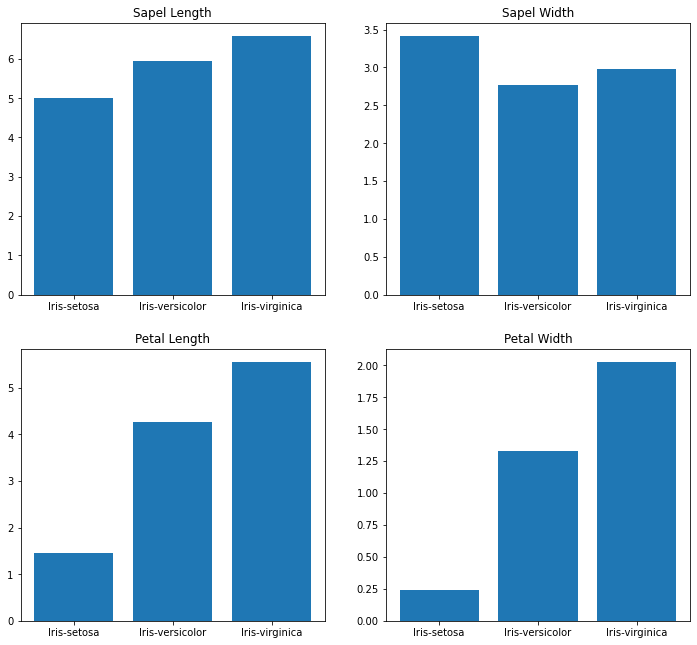

In [68]:
fig, ax = plt.subplots(2,2, figsize=(12,11))
ax[0,0].bar(grouped.index,grouped.SepalLengthCm) 
ax[0,1].bar(grouped.index,grouped.SepalWidthCm)
ax[1,0].bar(grouped.index,grouped.PetalLengthCm)
ax[1,1].bar(grouped.index,grouped.PetalWidthCm)
ax[0,0].set_title("Sapel Length")
ax[0,1].set_title("Sapel Width")
ax[1,0].set_title("Petal Length")
ax[1,1].set_title("Petal Width")
plt.show()

The plot above gave insight that Iris_virginaca is the biggest specie followed by Iris-versicolor.

## Checking the clusters present in the dataset base on the four feaures given

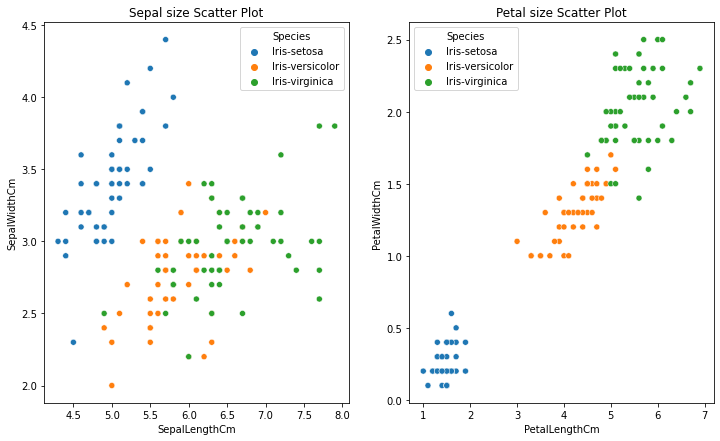

In [69]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,7))
sns.scatterplot(x='SepalLengthCm' , y= 'SepalWidthCm', data= iris, hue = 'Species', ax = ax1)
sns.scatterplot(x='PetalLengthCm' , y= 'PetalWidthCm', data= iris, hue = 'Species', ax = ax2 )
ax1.set_title("Sepal size Scatter Plot")
ax2.set_title("Petal size Scatter Plot")
plt.show()

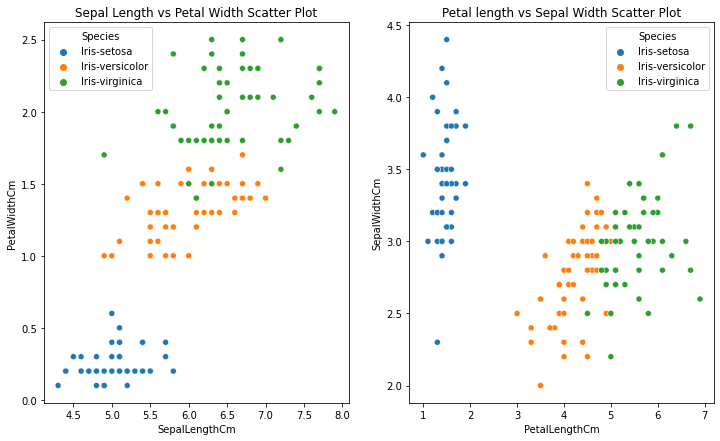

In [70]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,7))
sns.scatterplot(x='SepalLengthCm' , y= 'PetalWidthCm', data= iris, hue = 'Species', ax = ax1)
sns.scatterplot(x='PetalLengthCm' , y= 'SepalWidthCm', data= iris, hue = 'Species', ax = ax2 )
ax1.set_title("Sepal Length vs Petal Width Scatter Plot")
ax2.set_title("Petal length vs Sepal Width Scatter Plot")
plt.show()

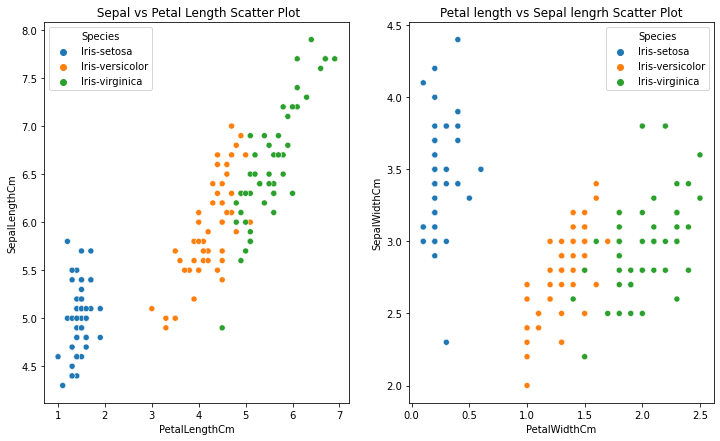

In [71]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (12,7))
sns.scatterplot(x='PetalLengthCm' , y= 'SepalLengthCm' , data= iris, hue = 'Species', ax = ax1)
sns.scatterplot(x= 'PetalWidthCm', y= 'SepalWidthCm', data= iris, hue = 'Species', ax = ax2 )
ax1.set_title(" Sepal vs Petal Length Scatter Plot")
ax2.set_title("Petal length vs Sepal lengrh Scatter Plot")
plt.show()

Base on the clusters seen in the scatter plots, it can been seen that the intercluster distance between Iris-versicolor and iris-virginica is smaller compare to Iris Setosa which clustered differently from the other two clusters.

### Modellling

Importing Machine learning Libraries

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, plot_confusion_matrix

In [73]:
iris.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Data Pre-processing 

In [77]:
y = iris.iloc[:,5:]
y = y.astype("category")
y = y.replace(['Iris-setosa','Iris-versicolor','Iris-virginica'], [0,1,2])
x = iris.iloc[:,1:5]
print(x)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [78]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

### Decision Tree Classifier

In [79]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
pred = model.predict(x_test)
score1 = confusion_matrix(y_test,pred)
accuracy1 = accuracy_score(y_test,pred)

In [80]:
print(accuracy1)

1.0


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


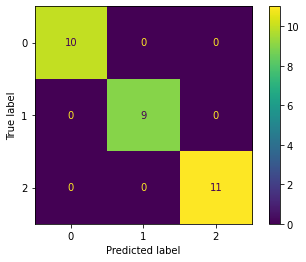

In [82]:
plot_confusion_matrix(model, x_test,y_test)

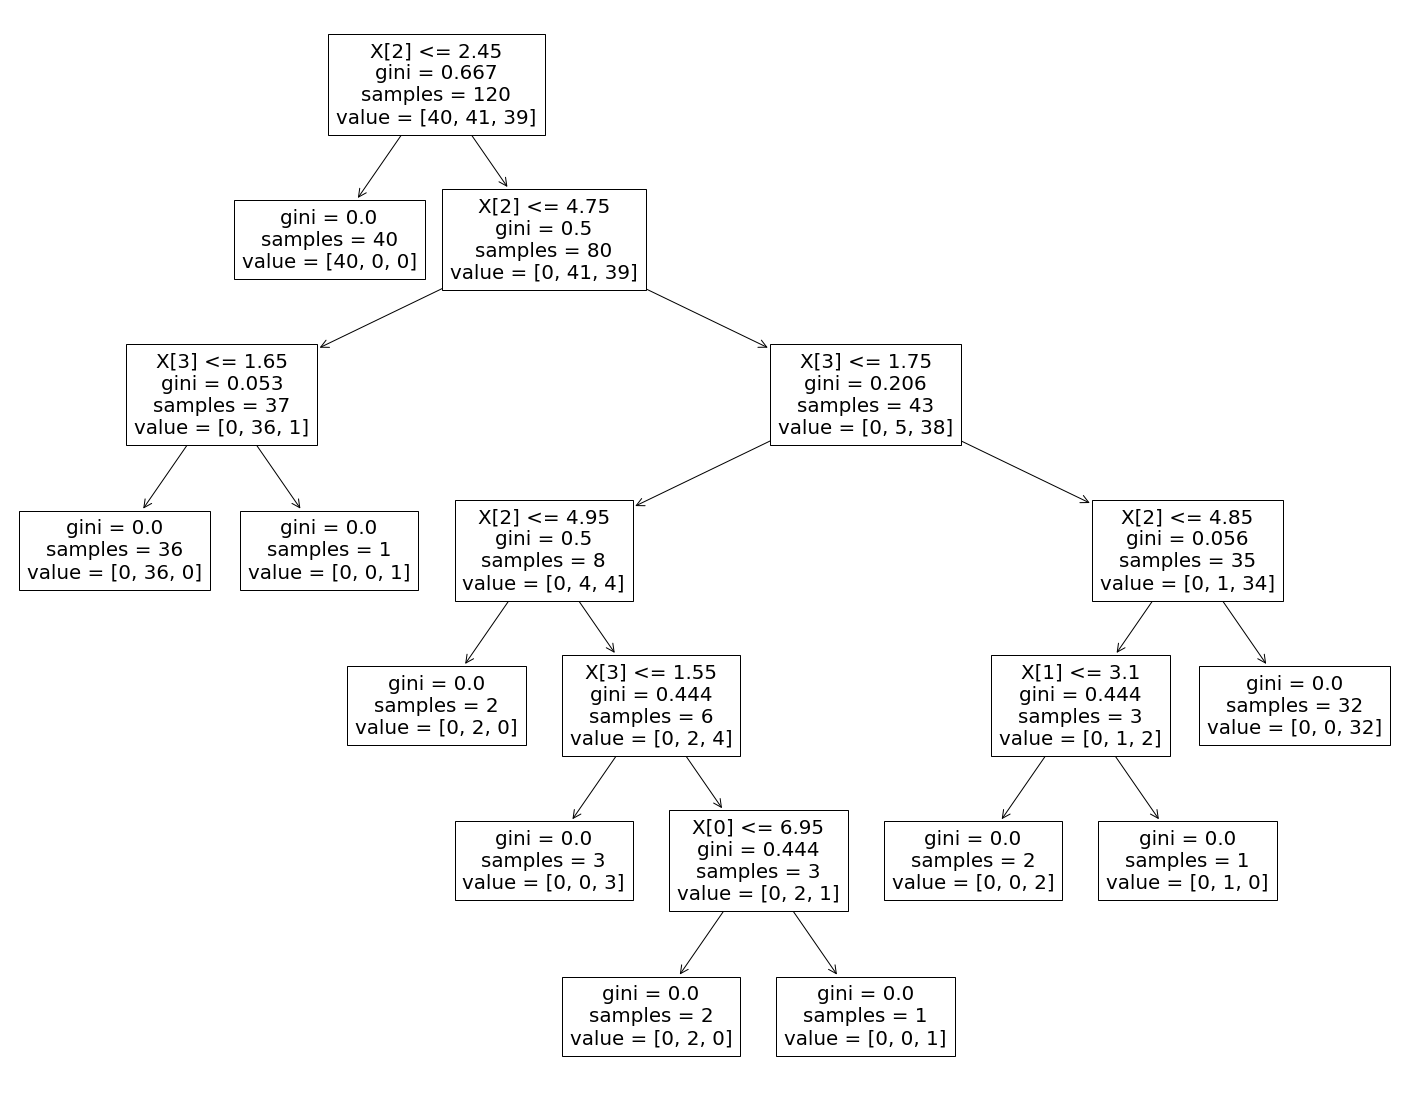

In [89]:
fig = plt.figure(figsize=(25,20))
plot_tree(model)
plt.show()

**In Conclusion**

The model prediction score is 100% which shows that DecisionTreeClassifier is the perfect fit for the dataset. There was no misclassifications. inputing new dataset to the model will sure give us atleast 95% accuracy.